# ７章　仮説と推定

(jijanwari 仮説を立てる　観測する　仮説を棄却するかどうか判断する）


# ７．１　統計的仮設検定　省略

# ７．２　事例：コイン投げ

コイン投げ  
コインに歪みがないことを示す帰無仮説は p=0.5となります  
この仮説と対立仮説である p != 0.5と比較して検定を行います  



In [5]:
import matplotlib.pyplot as plt
import math
import numpy as np

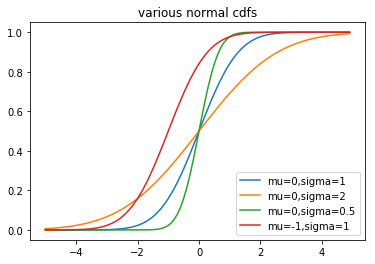

In [6]:
#正規分布の累積密度関数
# X が xより小さくなる確率を求める
def normal_cdf(x, mu=0, sigma=1):
    return ( 1 + math.erf( (x-mu)/ math.sqrt(2) / sigma )) / 2


xs = [ x / 10.0 for x in range(-50,50) ]

plt.plot(xs, [normal_cdf(x,sigma=1) for x in xs], '-', label='mu=0,sigma=1')
plt.plot(xs, [normal_cdf(x,sigma=2) for x in xs], '-', label='mu=0,sigma=2')
plt.plot(xs, [normal_cdf(x,sigma=0.5) for x in xs], '-', label='mu=0,sigma=0.5')
plt.plot(xs, [normal_cdf(x,mu=-1) for x in xs], '-', label='mu=-1,sigma=1')
plt.legend(loc=4)
plt.title("various normal cdfs")
plt.show()

[-8.75, -2.326345443725586, -2.0537471771240234, -1.880788803100586, -1.7506885528564453, -1.6448497772216797, -1.5547657012939453, -1.4757823944091797, -1.4050769805908203, -1.3407611846923828, -1.2815570831298828, -1.2265300750732422, -1.1749935150146484, -1.126394271850586, -1.080312728881836, -1.0364246368408203, -0.9944629669189453, -0.9541606903076172, -0.9153652191162109, -0.8779048919677734, -0.8416271209716797, -0.8064174652099609, -0.7721996307373047, -0.7388401031494141, -0.7063007354736328, -0.6744861602783203, -0.6433391571044922, -0.6128215789794922, -0.5828380584716797, -0.5533885955810547, -0.5243968963623047, -0.49584388732910156, -0.46769142150878906, -0.43992042541503906, -0.41245460510253906, -0.3853130340576172, -0.3584575653076172, -0.3318500518798828, -0.30547142028808594, -0.27932167053222656, -0.2533435821533203, -0.2275371551513672, -0.2019023895263672, -0.17638206481933594, -0.15097618103027344, -0.12566566467285156, -0.10043144226074219, -0.07527351379394531

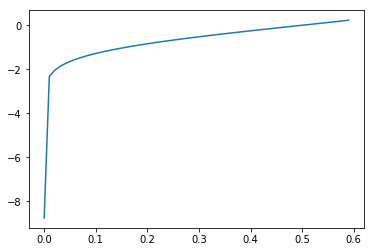

In [7]:
#確率がp となるような、 X<mid_z　の mid_zを求める
def inverse_normal_cdf(p, mu=0, sigma=1, tolerance=0.00001):
    """二分探索で、逆関数の近似値を計算する"""
    #標準正規分布でない場合、標準正規分布からの差分を求める
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    
    low_z, low_p = -10.0, 0 #normal_cdf(-10)は０（に近い値）である
    hi_z, hi_p = 10.0, 1    #normal_cdf(10)は１に近い値である
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) /2 #中央の値および
        mid_p = normal_cdf(mid_z) #その地点でのcdfの値
        
        if mid_p < p:
            #中央値はまだ小さいので、さらに上を使う
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            #中央値はまだ大きいので、さらに下を使う
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    return mid_z

xlist = np.arange(0, 0.6, 0.01)
saitmp1 = [ inverse_normal_cdf(xi) for xi in xlist]
print(saitmp1)

plt.plot(xlist, saitmp1, '-', label='mu=0,sigma=1')
plt.show()

In [8]:
#与えられた　区間に収まる　確率を求める

def normal_approximation_to_binomial(n,p):
    """Binomial(n,p)に相当するμとσを計算する"""
    mu = p * n
    sigma = math.sqrt(p*(1-p)*n)
    return mu, sigma

normal_probability_below = normal_cdf

def normal_probability_above(lo, mu=0, sigma=1):
    return 1- normal_cdf(lo, mu, sigma)

def normal_probability_between(lo, hi, mu=0, sigma=1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)



In [9]:
#確率が probabilityとなる区間を求める

def normal_upper_bound(probability, mu=0, sigma=1):
    """確率 P(Z<=z)となるzを返す"""
    return inverse_normal_cdf(probability, mu, sigma)

def normal_lower_bound(probability, mu=0, sigma=1):
    """確率 P(Z>=z)となるzを返す"""
    return inverse_normal_cdf(1-probability, mu, sigma)


def normal_two_sided_bounds(probability, mu=0, sigma=1):
    """指定された確率を包含する（平均を中心に）対称な境界を返す"""
    tail_probability = (1 - probability) / 2
    
    #上側の境界はテイル確率（tail_probability)分上に
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    
    #下側の境界はテイル境界（tail_probability)分下に
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    
    return lower_bound, upper_bound



### 0.5コイン(表が出る確率が0.5のコインのこと　以降そう表記します）の平均と分散を計算してみる

ただし、binomial分布を正規分布で近似したときの、その正規分布の平均と分散

In [10]:
#0.5コインを 1000回やったときの 平均と分散を計算してみる
mu_0, sigma_0 = normal_approximation_to_binomial(1000, 0.5)
print(mu_0)
print(sigma_0)

500.0
15.811388300841896


回数がloからhiの間となる確率が0.95であるような lo, hiを求める

In [52]:
lo, hi = normal_two_sided_bounds(0.95, mu_0, sigma_0) 
print(lo, hi )

469.01026640487555 530.9897335951244


### 0.5コインではなく0.55コインだったら何が起きるか

(jijanwari) 0.5コインだったら469-530の間になる確率が0.95  
469-530の間じゃない場合は、0.5コイン仮説を棄却する  
本当は0.55コインだったとき、 469-530からはずれて、（ちゃんと）0.5コインという間違った仮説を棄却する  
そうなる確率はいくらか  

In [12]:
#0.55コインでの 平均と分散を計算してみる
mu_1, sigma_1 = normal_approximation_to_binomial(1000, 0.55)
print(mu_1)
print(sigma_1)

550.0
15.732132722552274


In [13]:
# lo=469,  hi=530 は コインが0.5のときに p=0.95となる区間
type_2_probability = normal_probability_between(lo, hi, mu_1, sigma_1)
power = 1 - type_2_probability

power


0.8865480012953671

### 0.88654... 
### (jijanwari) 間違っている0.5コインという仮説を、ちゃんと棄却できる確率

-------------------------------------------------------
----
### ここで少し話をかえて、片側検定の場合についてです
### キム仮説が　コインに歪みがない、もしくはp<=0.5であると仮定してみましょう（以下 "0.5以下コイン仮説"）
この場合片側検定を使います。Xが500よりずっと大きければキム仮説を棄却し、５００よりも小さければ棄却しません。つまり5%の有意性で検定を行うには、normal_probability_belowを使って確率が95%となるカットオフ値を求めることになります

In [14]:
hi2 = normal_upper_bound(0.95, mu_0, sigma_0)
hi2

526.0073585242053

### 526以上なら生無仮説"0.5以下コイン仮説"を棄却する

### 0.55コインのときに（=mu_1, sigma_1)、526以上になる確率を計算してみる

In [15]:
type_2_probability_2 = normal_probability_below( hi2, mu_1, sigma_1)
power2 = 1 - type_2_probability_2
power2

0.9363794803307173

### Xが469（jijanwari 526の間違いでは？）より小さい（0.55コインだったらほとんど起こり得ない 確率 1-0.9363...）場合は ”0.5以下コイン仮説”は棄却しない  
### Xが526と531の間では、"0.5以下コイン仮説”は棄却するため、かなり強い検定であると言えます

jijanwari 両側だったら、531以上にならないと0.5コイン仮説を棄却しない  
それに比べて片側なら、526以上から 0.5以下コイン仮説を棄却する  
ので　”かなり強い検定であると言えます”  と言っている？  

-------------------------------------------------------
----
### この検定を測る別の尺度  p値   
特定の確率でのカットオフを選ぶ代わりに、H0が真であると仮定して、実際に観測された値と少なくとも同等に極端な値が生じる確率を計算した値


In [16]:
def two_sided_p_value(x, mu=0, sigma=1):
    if x >= mu:
        # xが平均より大きい場合、テイル確率は xより大きい分
        return 2 * normal_probability_above(x, mu, sigma)
    else:
        # xが平均より小さい場合、テイル確率は xより小さい分
        return 2 * normal_probability_below(x, mu, sigma)

print( two_sided_p_value( 529.5, mu_0, sigma_0) )

print( two_sided_p_value( 531.5, mu_0, sigma_0) )


0.06207721579598857
0.046345287837786575


x が 529.5より大きくなる確率は 0.0620...   
x が 531.5より大きくなる確率は 0.0463...   


## ７．３　信頼区間

分布を未知のパラメータとして、表が出る確率に関する仮説検定を行ってきました。  
もしこれが本当であるなら、観測値の周辺の信頼区間を求めるのが３番目の手法となります  

コイン投げ  
1000回の試行で 525回表が出たとすると、 pの推定値は 0.525  (1000回中 525回だから)  

この推定値はどの程度信頼できるでしょうか  

pの正確な値を知っているなら、中心極限定理により、このベルヌーイ変数の平均値は、近似的に平均p及び、次の標準偏差の正規分布に従います 

math.sqrt( p * ( 1 - p ) / 1000 )

ここではpが未知となっているので、先の推定値を使います。  


In [46]:
p_hat = 525 / 1000
mu = p_hat
sigma = math.sqrt( p_hat * ( 1 - p_hat ) / 1000 )

print(mu)
print(sigma)


0.525
0.015791611697353755


jijanwari  
1000回投げて 525回表が出た　という観測結果は、平均0.525コイン　分散0.01579...という分布に従った現象が、１回観測されたとみなしている        
次に、 検証したい仮説（例えば0.5コイン）が、上の分布の95%範囲に入っているかどうかを確認する  
そのために、上の分布の 95%区間を求める

In [47]:
normal_two_sided_bounds( 0.95, mu, sigma)

(0.4940490278129096, 0.5559509721870904)

muとsigmaは完全に理にかなったものだとは言えませんが、ともかくこの方法が使われます  
正規分布の近似を使うと、p の正しい範囲が上記の区間に入るのは ”95%の確率で信頼できる”　という結論になります。

この結果、0.5(jijanwari コインに歪みがない仮説==確率が0.5となる) はこの信頼区間にあるため、コインに歪みがあるとは結論づけられません(= jijanwari コインに歪みがない仮説は棄却されない）  
では、５４０回表が出た場合はどうでしょうか？  

In [18]:
p_hat = 540 / 1000
mu = p_hat
sigma = math.sqrt( p_hat * ( 1 - p_hat ) / 1000 )

print(mu)
print(sigma)

normal_two_sided_bounds( 0.95, mu, sigma)

0.54
0.015760710643876435


(0.5091095927295919, 0.5708904072704082)

この場合は、0.5(jijanwari コインに歪みがない仮説のもとでは0.5となる) はこの信頼区間にないため、コインに歪みがないとは結論づけられません  

## ７．４　pハッキング

「有意」な結果を得ようとすれば、それは可能  
データ・セットに対する十分な仮説検定を行えば、そのうちの１つは明らかな優位性を示します  
ハズレ値を適切に取り除くことで、p値はおそらく0.05未満にできます (5.2節で、これと同様のことを行っている)  
「p値を使った推定の枠組み」から得られる結論に対して何らかの手を入れてしまうこの手法をpハッキングと呼ぶ  
これを批判した優れた記事が  xxx   

サイエンティストとして適切に振る舞いたいのであれば  
データを調査する前に仮説を決定し、  
データの整理は仮説を前提とせず行い、  
p値は常識の代用品とはならないことを肝に命じておくことです（これとは異なる手法が　ベイズ推定　です)


## ７．５　事例：A／Bテストの実施

ある広告をN人がみて n人がクリックした  
そうなる確率は、平均P=n/N, 標準偏差 σ=sqrt( p * ( 1-p) / N )  の正規分布で近似できる確率変数とみなせます

広告Aを 1000人が見て、200人がクリックした  => Pa=0.2 , σa=0.012649  
広告Bを 1000人が見て、180人がクリックした  => Pb=0.18, σb=0.012149   

### このとき (jijanwari 上の例は一人が広告を見てクリックしたかどうかを１０００回行ったと言えると思いますが)
### 仮説：(jijanwari  一人が広告Aを見てクリックする確率と、一人がBをみてクリックする確率が同じ )
### この仮説が正しいか？

広告Aを見てクリックする確率と、広告Bを見てクリックする確率の差は、  
平均 Pa-Pb, 標準偏差は sqrt( σa^2 + σb^2 ) = 0.017538529014715004 の分布となる  

"一人が広告Aを見てクリックする確率と、一人がBをみてクリックする確率が同じ"  
を Pa=Pb つまり Pa-Pb=0であると考えて  

Pa-Pbが、平均0 、標準偏差=0.01753...のときに、 Pa-Pb=0.02になる確率が  
低ければ、もとの仮説を破棄する  
高ければ、もとの仮説を支持する  

広告A 200人、 広告B 180人なら、そうなる確率は 0.254  
広告A 200人、 広告B 150人なら、そうなる確率は 0.003  


プログラムは下の通り  


In [51]:
def estimated_parameters(N, n):
    p = n/N
    sigma = math.sqrt( p * (1-p) / N )
    return p, sigma

def a_b_test_statistic(N_A, n_A, N_B, n_B):
    p_A, sigma_A = estimated_parameters(N_A, n_A)
    print("N:%d, n:%d, p:%f, s:%f" % ( N_A , n_A , p_A , sigma_A ) )
    p_B, sigma_B = estimated_parameters(N_B, n_B)
    print("N:%d, n:%d, p:%f, s:%f" % ( N_B , n_B , p_B , sigma_B ) )
    print(math.sqrt( sigma_A**2 + sigma_B**2))
    return (p_B - p_A)/math.sqrt( sigma_A**2 + sigma_B**2)
    

z = a_b_test_statistic(1000, 200, 1000, 180)
print("分散が0.017538...での-0.02が、分散=1のときにどういう値と言えるか z=%f" % z)
print( two_sided_p_value(z) )

print( two_sided_p_value(0.02, sigma=0.017538529014715004) )


N:1000, n:200, p:0.200000, s:0.012649
N:1000, n:180, p:0.180000, s:0.012149
0.017538529014715004
分散が0.017538...での-0.02が、分散=1のときにどういう値と言えるか z=-1.140346
0.254141976542236
0.25414197654223636


## ７．６　ベイズ推定

事前分布、事後分布  

事前分布に対して 観測データとベイズの定理を用いて、事後分布を求めます  

ベータ分布　形はp.105に載っている  

ベータ分布のパラメータは２つ B(alpha, beta)  

コインを投げるというとき表（裏）が出る確率分布を、表と裏の回数を alpha, betaとしたベータ分布で表しておき、  

投げたあとの事後分布を、alphaとbetaに足したベータ分布とするというやり方がある  


事前分布 B(A1, B1)  
↓  
事後分布 B(A1+A2, B1+B2)  

A1, B1は事前のパラメータ  
コインに歪みがあるか否かを明言したくないなら A1=1, B1=1  
または55%の確率で表が出るという強い確信があるなら、A1=55, B1=45 にする  
(jijanwari A1=550, B1=450ならもっと強い確信がある ( jijanwari ここでいう強い=実際に起きた結果が軽視される）)  

コインを投げて A2, B2回表と裏がでたら、分布が B(A1+A2, B1+B2)に変わる  

例  
事前分布が B(20, 20)で、 10回コインを投げて3回しかでなかったら、  
ベイズの定理を使って求まる事後分布は　B(20+3, 20+7)となる
